In [1]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq


# setup pytrend library and keyword define 


In [27]:

pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "dropship supplier"





# Data Request

In [28]:


pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo='', gprop ='')

# 
Country wise interest

In [29]:


region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

C:\Users\sahaa\AppData\Local\Temp\ipykernel_9908\3968625346.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




AttributeError: module 'matplotlib.pyplot' has no attribute 'tilte'

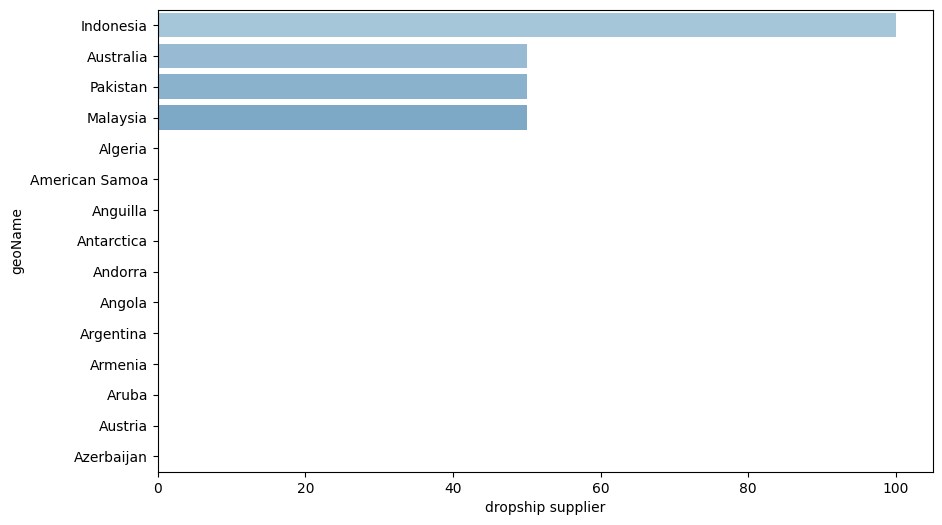

In [30]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.tilte(f"Top Countries searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()





# World map



C:\Users\sahaa\AppData\Local\Temp\ipykernel_9908\3941695769.py:2: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(region_data,


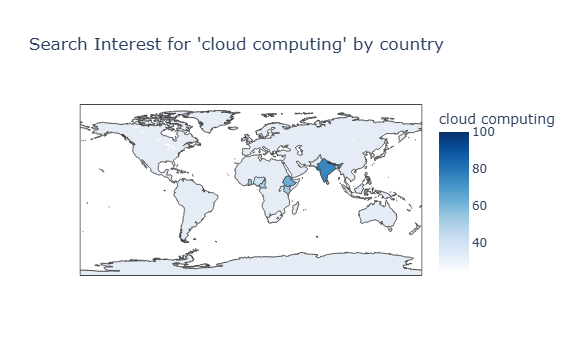

In [10]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations= 'geoName',
                    locationmode= 'country names',
                    color= keyword,
                    title=f"Search Interest for '{keyword}' by country",
                    color_continuous_scale= 'Blues')
fig.show()

# Time wise interest


In [11]:
time_df = pytrends.interest_over_time()

C:\Users\sahaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



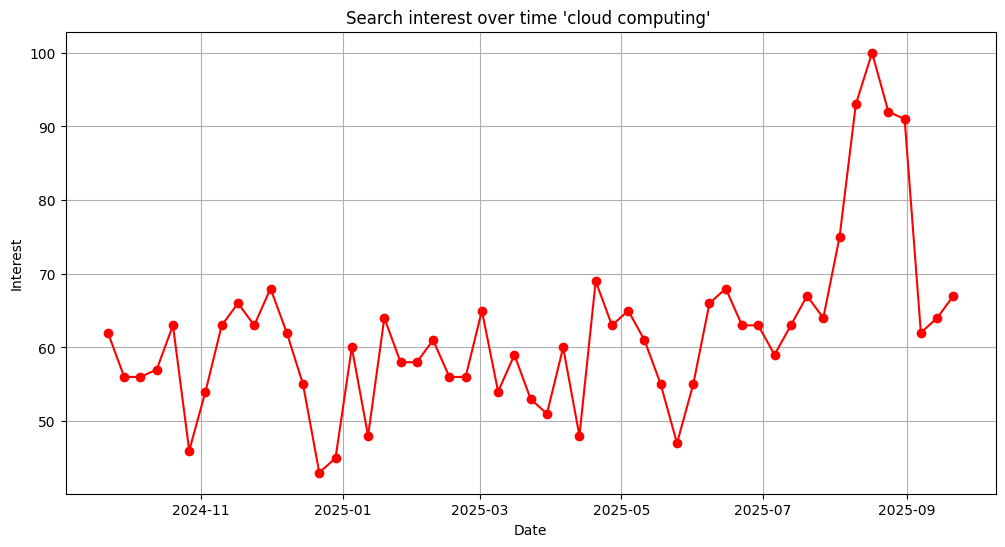

In [12]:
plt.figure(figsize = (12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'Red')
plt.title(f"Search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple keywords compare

In [13]:
kw_list = ["Cloud Computing", "Data Science", "Machine Learning", "Software Engineering"]
pytrends.build_payload(kw_list, cat=0, timeframe = 'today 12-m', geo ='', gprop='')

C:\Users\sahaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



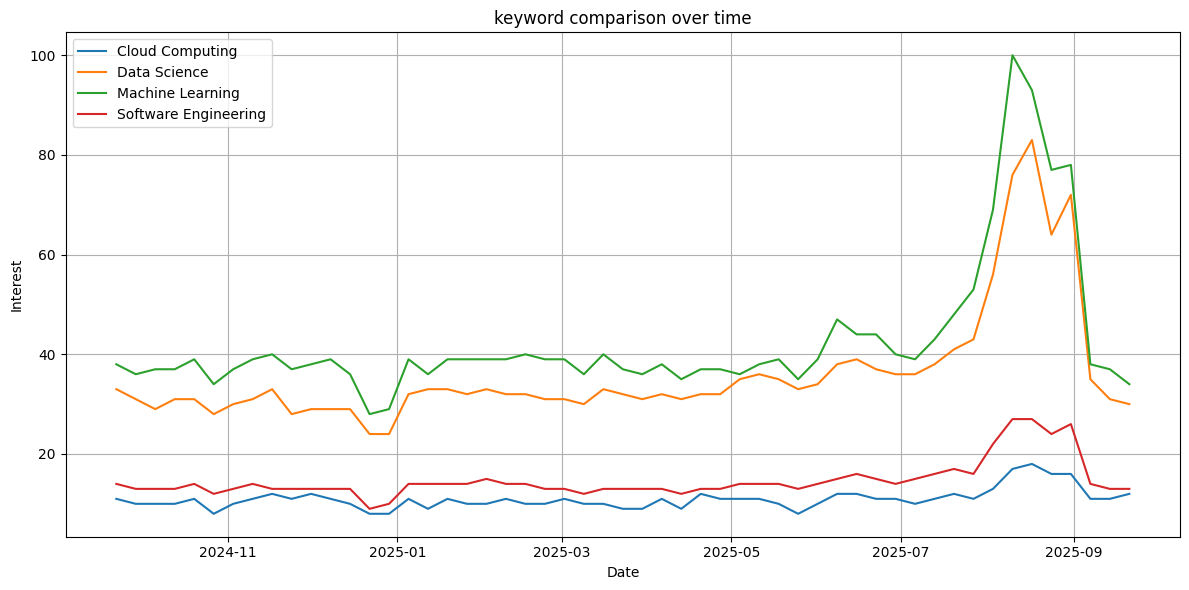

In [14]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

